# Discrete Fourier Transform(DFT)
The discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. The interval at which the DTFT is sampled is the reciprocal of the duration of the input sequence

The DFT is therefore said to be a frequency domain representation of the original input sequence. If the original sequence spans all the non-zero values of a function, its DTFT is continuous (and periodic), and the DFT provides discrete samples of one cycle. If the original sequence is one cycle of a periodic function, the DFT provides all the non-zero values of one DTFT cycle.

The Discrete Fourier Transform (DFT) of a sequence \( x[n] \) of length \( N \) is given by:

$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]}$

Where:

- N = number of samples
- n = current sample
- k = current frequency, where k∈[0,N−1]
- $x_n$ = the sine value at sample n
- $X_k$ = The DFT which include information of both amplitude and phase

The DFT can be computed efficiently using algorithms like the Fast Fourier Transform (FFT), which significantly reduces the computational complexity from $( O(N^2) )$ to $( O(Nlog N) )$.The FFT algorithm recursively divides the DFT computation into smaller DFTs until reaching base cases, where the DFT can be computed directly.

![Fast Fourier Transform](http://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/10_fast-fourier-transform.jpg)




The DFT is the most important discrete transform, used to perform Fourier analysis in many practical applications.[2] In digital signal processing, the function is any quantity or signal that varies over time, such as the pressure of a sound wave, a radio signal, or daily temperature readings, sampled over a finite time interval (often defined by a window function[3]). In image processing, the samples can be the values of pixels along a row or column of a raster image. The DFT is also used to efficiently solve partial differential equations, and to perform other operations such as convolutions or multiplying large integers.


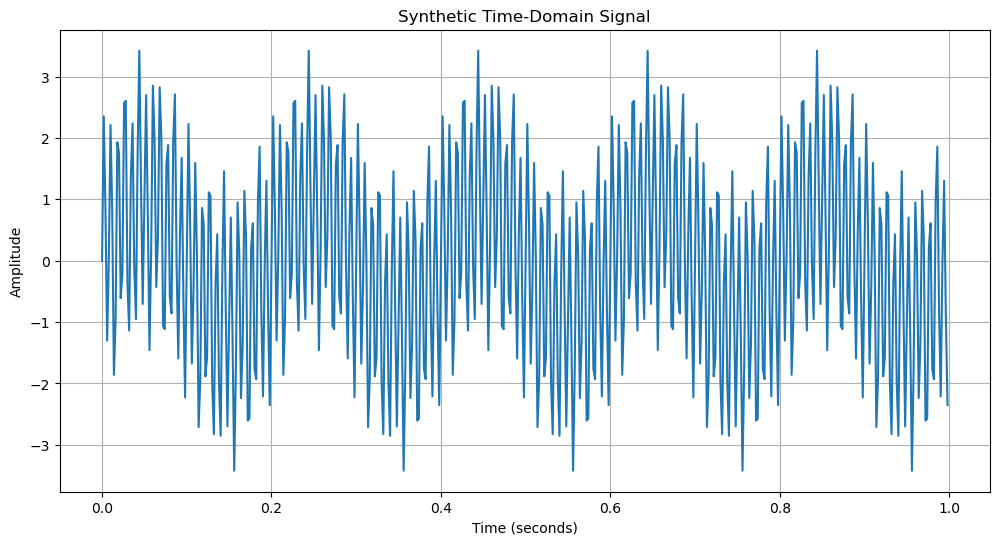

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t = np.arange(0, 1, 1/500)  # Time vector for 1 second

# Synthetic signal: combination of three sine waves
signal = np.sin(10*np.pi*t) + 0.5*np.sin(100*np.pi*t) + 2*np.sin(240*np.pi*t)

# Plotting the synthetic time-domain signal
plt.figure(figsize=(12, 6))
plt.plot(t, signal)
plt.title('Synthetic Time-Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

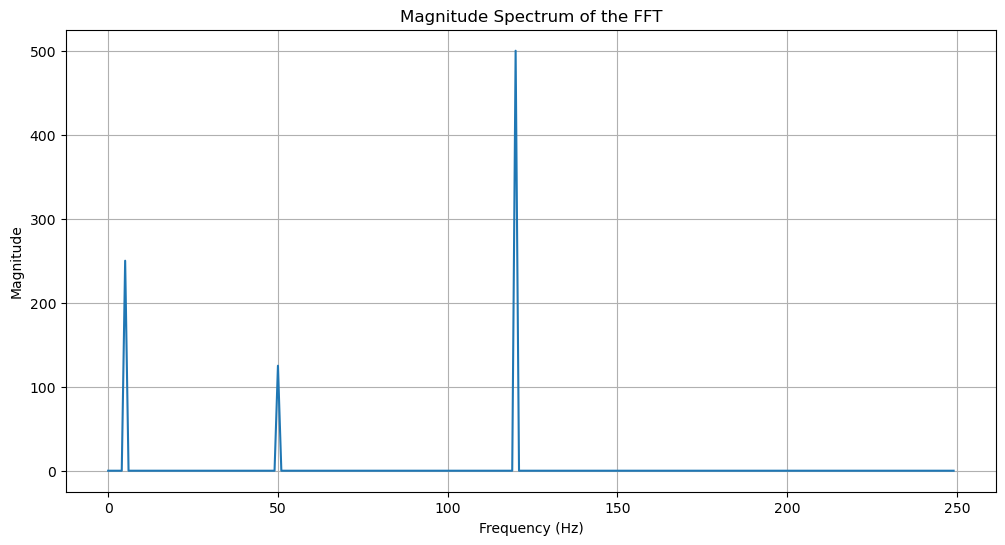

In [43]:
# Compute the FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(n=t.size, d=1/500)

# Compute magnitude of the FFT for plotting (since FFT is complex)
fft_magnitude = np.abs(fft_result)

# Only plot the positive half of the frequencies (since it's symmetric)
half_n = len(fft_freq) // 2  # Half of the length of fft_freq array
fft_freq_positive = fft_freq[:half_n]
fft_magnitude_positive = fft_magnitude[:half_n]

# Plotting the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(fft_freq_positive, fft_magnitude_positive)
plt.title('Magnitude Spectrum of the FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

The plot above illustrates the magnitude spectrum of the FFT of our synthetic signal.
As expected from our synthetic dataset, there are prominent peaks at the frequencies of the original sine waves: 5 Hz, 50 Hz, and 120 Hz. The magnitude of these peaks corresponds to the amplitude of the sine waves in the time-domain signal, with the tallest peak at 5 Hz reflecting the highest amplitude component of the signal.

# Some Properties of DFT

# 1. Linearity

The DFT is a linear transformation i.e 

DFT $ (ax[n] + by[n]) $ =  $ aX[k] + bY[k] $, 
 
 where $ X[k] $ and $ Y[k] $ are the DFTs of $ x[n] $ and $ y[n] $ respectively.

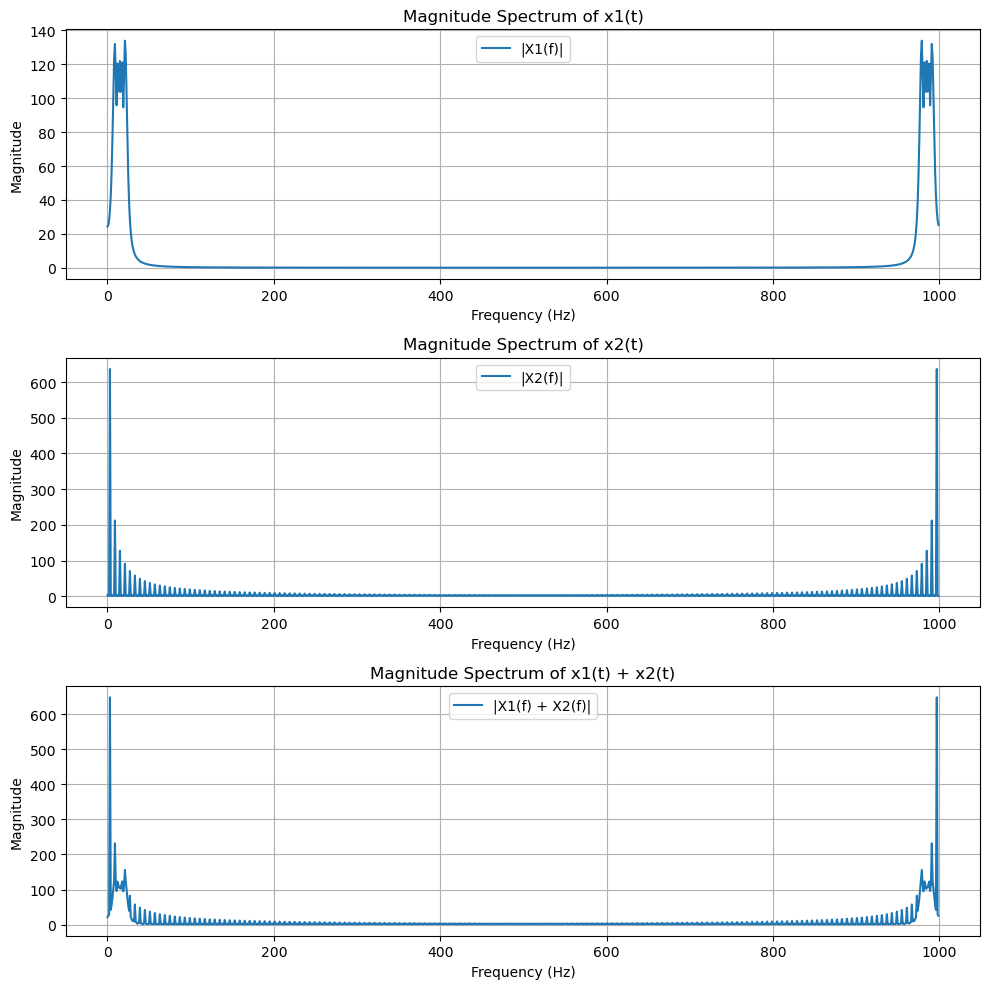

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define synthetic signals
t = np.linspace(0, 1, 1000)
x1 = np.sin(2 * np.pi * (5 + t * 10) * t)  # Sinusoid with frequency increasing linearly from 5 Hz to 15 Hz
x2 = np.sign(np.sin(2 * np.pi * 3 * t))  # Square wave with frequency 3 Hz

# Compute their DFTs
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)

# Linearity property: DFT of sum equals sum of DFTs
X_sum = np.fft.fft(x1 + x2)

# Plot the magnitude spectrum of the signals
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(np.abs(X1), label='|X1(f)|')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of x1(t)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(np.abs(X2), label='|X2(f)|')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of x2(t)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(np.abs(X_sum), label='|X1(f) + X2(f)|')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of x1(t) + x2(t)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Parsevals Theorem

The energy of a signal in the time domain is equal to the energy of its DFT in the frequency domain.
The expression is as follows:

$\sum_{n=-\infty}^{\infty} |x[n]|^2 = \frac{1}{2\pi} \sum_{k=-\infty}^{\infty} |X[k]|^2$


In [23]:
import numpy as np

# Given signal x1
t = np.linspace(0, 1, 1000)
x1 = np.sin(2 * np.pi * (5 + t * 10) * t)  # Sinusoid with frequency increasing linearly from 5 Hz to 15 Hz

# Compute the energy of the signal in the time domain
energy_time_domain_x1 = np.sum(np.abs(x1)**2)

# Compute the DFT of the signal
X1_freq_domain = np.fft.fft(x1)

# Compute the energy of the signal in the frequency domain
energy_freq_domain_x1 = np.sum(np.abs(X1_freq_domain)**2) / len(X1_freq_domain)

# Compare the energies
tolerance = 1e-10
energy_conservation_x1 = np.abs(energy_time_domain_x1 - energy_freq_domain_x1) < tolerance

# Print the results
print("Energy in the time domain (x1):", energy_time_domain_x1)
print("Energy in the frequency domain (x1):", energy_freq_domain_x1)
print("Energy conservation for signal x1:", energy_conservation_x1)


Energy in the time domain (x1): 499.02335773970555
Energy in the frequency domain (x1): 499.0233577397055
Energy conservation for signal x1: True


# Convolution property

The DFT of the circular convolution of two sequences is equal to the element-wise product of their DFTs.

$ \text{DFT}\{ x_1[n] \ast x_2[n] \} = \text{DFT}\{ x_1[n] \} \cdot \text{DFT}\{ x_2[n] \} $



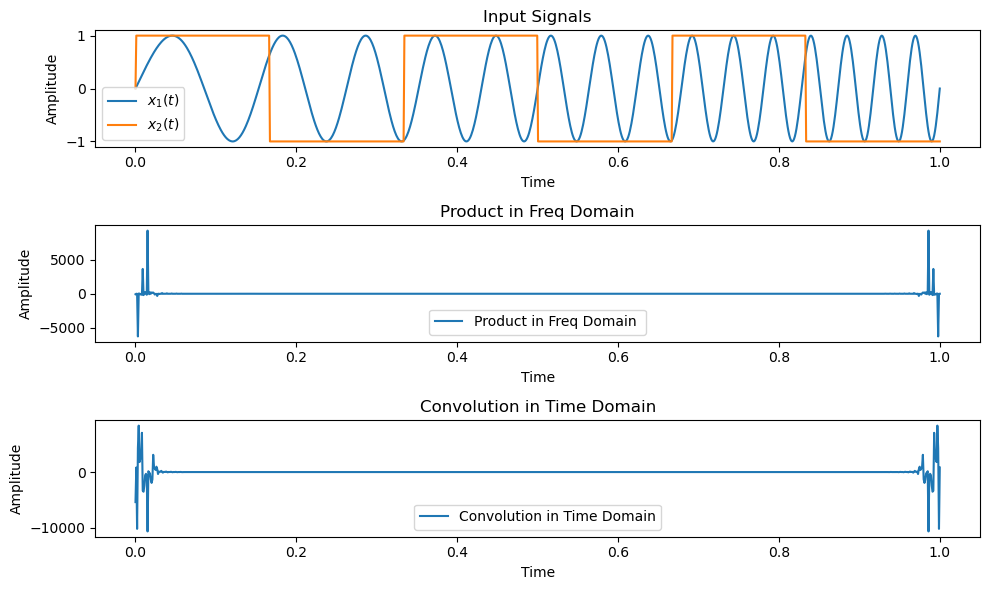

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Given signals
t = np.linspace(0, 1, 1000)
x1 = np.sin(2 * np.pi * (5 + t * 10) * t)  # Sinusoid with frequency increasing linearly from 5 Hz to 15 Hz
x2 = np.sign(np.sin(2 * np.pi * 3 * t))    # Square wave with frequency 3 Hz

# Compute the convolution of x1 and x2 in the time domain
conv_time_domain = np.convolve(x1, x2, mode='same')  

# Compute the DFT of x1 and x2
X1_freq_domain = np.fft.fft(x1)
X2_freq_domain = np.fft.fft(x2)

# Compute the element-wise product of the DFTs
product_freq_domain = X1_freq_domain * X2_freq_domain

# Compute the inverse DFT of the product
X3_conv_time_domain = np.fft.fft(conv_time_domain)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, x1, label='$x_1(t)$')
plt.plot(t, x2, label='$x_2(t)$')
plt.title('Input Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t,product_freq_domain.real , label='Product in Freq Domain ')
plt.title('Product in Freq Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, X3_conv_time_domain.real, label='Convolution in Time Domain')
plt.title('Convolution in Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


# Taking a 2-D DFT of an Image

The 2-D DFT is calculated using the formulae

$F(u, v) = \sum_{x=0}^{N-1} \sum_{y=0}^{M-1} f(x, y) \cdot e^{-j2\pi \left(\frac{ux}{N} + \frac{vy}{M}\right)}$

Where:
- $F(u, v)$ is the DFT of the 2D signal at frequency coordinates $(u, v)$.
- $f(x, y)$ is the 2D signal in the spatial domain at spatial coordinates \((x, y)\).
- $N$ and $M$ are the dimensions (width and height) of the 2D signal.
- $e^{-j2\pi \left(\frac{ux}{N} + \frac{vy}{M}\right)}$ is the complex exponential term, representing the contribution of each spatial pixel to the frequency domain.

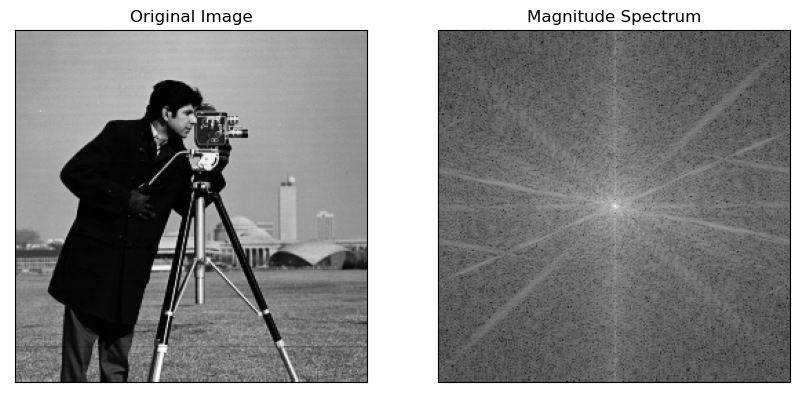

In [25]:
! pip install opencv-python
import numpy as np
import cv2
from matplotlib import pyplot as plt
import urllib.request

# URL of the image
image_url = "https://www.cs.cmu.edu/afs/cs.cmu.edu/academic/class/15463-f10/www/proj0/www/gmethvin/cameraman.png"

# Read the image directly from the URL
try:
    with urllib.request.urlopen(image_url) as response:
        arr = np.asarray(bytearray(response.read()), dtype=np.uint8)
        image = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)  # Load it as grayscale
except Exception as e:
    print("Error loading image from URL:", e)

# Perform 2D DFT if image is successfully loaded
if 'image' in locals():
    # Perform 2D DFT
    dft_image = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency component to the center
    dft_image_shifted = np.fft.fftshift(dft_image)

    # Calculate the magnitude spectrum
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_image_shifted[:, :, 0], dft_image_shifted[:, :, 1]))

    # Display the original image and magnitude spectrum
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()


# Recent Advances in the field of DFT computation
**Sparse Fourier Transforms (SFTs)**:

Imagine you're analyzing a musical piece. Most instruments produce a limited number of fundamental tones and harmonics. Traditional DFT treats every data point equally, but SFTs take advantage of this sparsity.

**Recent breakthroughs include**:

1. **Deterministic error-free algorithms**: Unlike traditional DFTs, SFTs can now provide exact results for sparse signals. This is crucial for applications where even tiny errors can have significant consequences, such as medical imaging or radar signal processing.
2. **Faster computation for sparse signals**: SFT algorithms can now compute the DFT in time proportional to the number of dominant frequencies (sparsity) rather than the total data size. This offers dramatic speedups for signals with a limited number of important frequencies.

Given below is a graph that compares the performance of FFT libraries and optimized SFFT : 

![Image Alt Text](https://www.spiral.net/software/sfft/1-1.png)

The graphic shows a comparison of the SFFT v3 reference implementation, the optimized SFFT v3 implementation and FFTW, with respect to implementation efficiency. The SFFT performance was increased significantly by applying different optimizations and is now about equally efficient as the high- performance FFTW library for large input sizes

**Hardware Acceleration and Specialized Algorithms**:

While SFTs excel at exploiting signal properties, researchers are also looking at hardware and algorithm advancements:

1. **FPGAs for faster DFTs**: Field-Programmable Gate Arrays (FPGAs) are customizable chips that can be optimized for specific tasks. Recent work explores using FPGAs to accelerate DFT computations, achieving significant speedups compared to traditional software implementations.
2. **Specialized algorithms for real-world scenarios**: Researchers are developing new algorithms tailored for specific data types or applications. For instance, there's ongoing development of algorithms for:

  - Real-valued data (which occurs frequently in signal processing) that can exploit symmetries to reduce computation [4].
  - Sliding window DFTs used for real-time analysis of streaming data, where new data arrives continuously [2]. These algorithms aim to efficiently compute the DFT on small chunks of data as it arrives.
Impact of these advancements:

**These recent advances hold significant promise for various fields**:

1. **Faster signal processing**: SFTs and hardware acceleration can significantly speed up tasks like image and audio analysis, making real-time applications more feasible.
2. **Improved medical diagnostics**: Faster and more accurate DFT computations can lead to faster analysis of medical images like X-rays and MRIs.
3. **Enhanced communication systems**: Efficient DFT techniques can improve signal processing in communication systems, leading to clearer calls and faster data transfer rates.
 

# FT being a global transform 
A major disadvantage of the Fourier transform is it captures global frequency information, meaning frequencies that persist over an entire signal. This kind of signal decomposition may not serve all applications well, for example electrocardiography (ECG), where signals have short intervals of characteristic oscillation. 


An alternative approach is the wavelet transform, which decomposes a function into a set of wavelets.


![Sample Image](https://lh3.googleusercontent.com/CNIMHDj2NnM1UKW9GrLrLwJaFz8842K0qvH89YHYzDpKqAlnKNlz32ymU2CEcQhZRhKN_YKBglNiclT_3QWs0wfQ2TGJ9cUIwxq0YBNUSd5FyEAowBMWGBtrkMExkQZKAMt7UyA0)


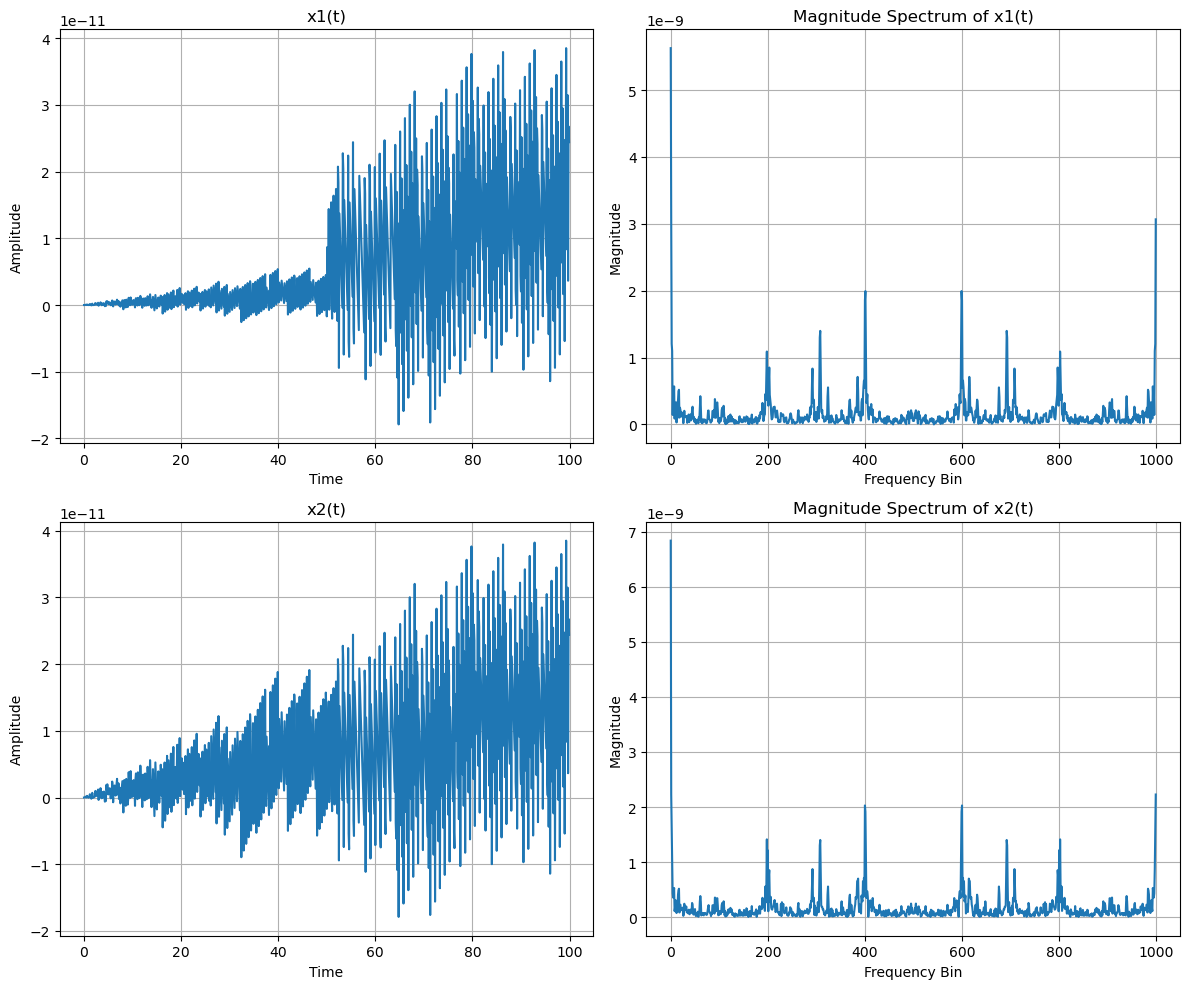

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise functions
def x1(t):
    if t < 50:
        return np.sin(200 * np.pi * t)
    else:
        return 5 * np.sin(100 * np.pi * t) + np.sin(200 * np.pi * t)

def x2(t):
    return 5 * np.sin(100 * np.pi * t) + np.sin(200 * np.pi * t)

# Parameters
N = 1000  # Number of samples
T = 1.0 / N  # Sample spacing
t = np.linspace(0.0, 100.0, N, endpoint=False)

# Generate samples for both functions
x1_samples = np.array([x1(ti) for ti in t])
x2_samples = np.array([x2(ti) for ti in t])

# Compute the DFT for both functions
x1_fft = np.fft.fft(x1_samples)
x2_fft = np.fft.fft(x2_samples)

# Plot the functions and their magnitude spectra
plt.figure(figsize=(12, 10))

# Plot x1(t)
plt.subplot(2, 2, 1)
plt.plot(t, x1_samples)
plt.title('x1(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(np.abs(x1_fft))
plt.title('Magnitude Spectrum of x1(t)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.grid(True)

# Plot x2(t)
plt.subplot(2, 2, 3)
plt.plot(t, x2_samples)
plt.title('x2(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(np.abs(x2_fft))
plt.title('Magnitude Spectrum of x2(t)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


We see that although both the functions are different , we get the spikes at same point in the DFT.

Below we perform a Continous Wavelet Transform on these 2 signals :

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


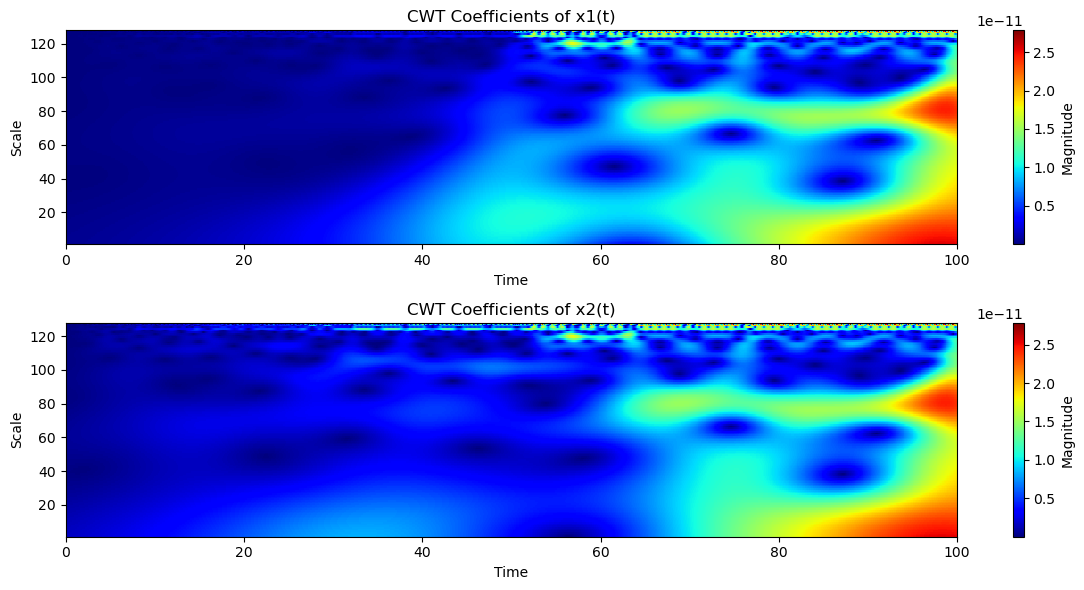

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Define the piecewise functions
def x1(t):
    if t < 50:
        return np.sin(200 * np.pi * t)
    else:
        return 5 * np.sin(100 * np.pi * t) + np.sin(200 * np.pi * t)

def x2(t):
    return 5 * np.sin(100 * np.pi * t) + np.sin(200 * np.pi * t)

# Parameters
N = 1000  # Number of samples
T = 1.0 / N  # Sample spacing
t = np.linspace(0.0, 100.0, N, endpoint=False)

# Generate samples for both functions
x1_samples = np.array([x1(ti) for ti in t])
x2_samples = np.array([x2(ti) for ti in t])

# Compute the Continuous Wavelet Transform (CWT) for both x1(t) and x2(t)
scales = np.arange(1, 128)
x1_cwt = signal.cwt(x1_samples, signal.morlet2, scales)
x2_cwt = signal.cwt(x2_samples, signal.morlet2, scales)

# Check if the CWT coefficients are equal
print(x1_cwt == x2_cwt)

# Plot the CWT coefficients
plt.figure(figsize=(12, 6))

# Plot CWT coefficients for x1(t)
plt.subplot(2, 1, 1)
plt.imshow(np.abs(x1_cwt), extent=[0, 100, 1, 128], aspect='auto', cmap='jet', interpolation='nearest')
plt.colorbar(label='Magnitude')
plt.title('CWT Coefficients of x1(t)')
plt.xlabel('Time')
plt.ylabel('Scale')

# Plot CWT coefficients for x2(t)
plt.subplot(2, 1, 2)
plt.imshow(np.abs(x2_cwt), extent=[0, 100, 1, 128], aspect='auto', cmap='jet', interpolation='nearest')
plt.colorbar(label='Magnitude')
plt.title('CWT Coefficients of x2(t)')
plt.xlabel('Time')
plt.ylabel('Scale')

plt.tight_layout()
plt.show()


We observe that in CWT we have information about frequenct as well as time. The CWT coefficients are not equal for the two functions x1(t) and x2(t), which is expected since the two functions have different time-frequency characteristics.

### Summary

- So in this Notebook we learned about Discrete Fourier Transform , its computation and also learned about its properties.
- We also verified these properties using python and calculated 2D DFT of an image as well 
- Then we went on to learn about some recent advances in the field of DFT computation and learned briefly about SFFT and that it performs faster computation in many cases than the state of the art FFT algorithm used to calculate DFT
- Then at the end we saw that FT is a global transform , and it doesnt tell us which frequney occurs at what time. To learn about frequency and time as well , we go towards some other transforms like Wavelet Transforms

## End of Tutorial